# Milestones 2

## Perkenalan


`Name : Aan Nurliyanah`

`Batch : 002`

Link Hugging Face :

https://huggingface.co/spaces/nurliyanahaan/Milestones2P2


## Assignment Objectives

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Topics

Natural Language Processing : Text Categorization

## Import Libraries

In [ ]:
!pip install tensorflow

# untuk perhitungan data, pengolahan data, dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# untuk spliting data
from sklearn.model_selection import train_test_split

# untuk preprocessing data
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


# untuk definisi model 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, Dropout, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# untuk menampilkan data teks secara visual
from wordcloud import WordCloud

# untuk evaluasi model 
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay


# untuk import model 
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data Loading and Overview

Dataset ini diambil dari sumber Kaggle :

https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch


### About Dataset 

The dataset is a collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021.

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Download data menggunakan API dari kaggle.com

In [ ]:
!kaggle datasets download -d nikhileswarkomati/suicide-watch

 94% 57.0M/60.6M [00:00<00:00, 150MB/s]
100% 60.6M/60.6M [00:00<00:00, 137MB/s]


In [ ]:
!unzip -q /content/suicide-watch.zip -d dataset

Loading data dengan menggunakan pd.read_csv

In [ ]:
data = pd.read_csv('/content/dataset/Suicide_Detection.csv')

In [ ]:
data

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


Melihat ukuran data

In [ ]:
data.shape

(232074, 3)

## Data Cleaning

Membuat copy dari dataframe agar data awal tetap tersimpan. 

In [ ]:
data_cl = data.copy()

Menghapus kolom Unnamed : 0 karena tidak berpengaruh dalam model dan hanya sebagai index unique saja 

In [ ]:
data_cl.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data_cl.head(2)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide


Mengecek data apakah ada missing value

In [ ]:
data_cl.isnull().sum()

text     0
class    0
dtype: int64

Mengecek data apakah ada data duplikat 

In [ ]:
data_cl[data_cl.duplicated()].shape

(0, 2)

General Overview : 

- tidak ada missing value 
- tidak ada data duplikat 
- drop kolom yang tidak digunakan

## Exploratory Data Analysis (EDA)

Melihat data target 

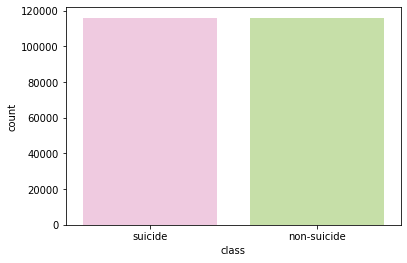

In [ ]:
sns.countplot(data=data_cl,x='class',palette="PiYG")

Dari visualisasi diatas didapatkan bahwa jumlah kedua kategori balance. Sehingga mempermudah dalam pemodelan yang akan dilakukan nanti, tidak perlu handling imbalance. 

## Data Preprocessing

### Preprocessing ke salah satu teks

In [ ]:
# Melihat Teks Pertama

print(data_cl.text[0])

Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.


#### Lowercase

In [ ]:
# Ubah teks ke lowercase

teks = data_cl.text[0]
teks_lower = teks.lower()
teks_lower

"ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her. as of a few days ago, she began threatening suicide. i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe i'll come back. i know a lot of people will threaten this in order to get their way, but what happens if she really does? what do i do and how am i supposed to handle her death on my hands? i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure. i'm worried today may be the day she does it and i hope so much it doesn't happen."

#### Punctuation

In [ ]:
# Menghilangkan Tanda Baca
teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Other Preprocessing

In [ ]:
# Preprocessing Lain ,menghilangkan tanda baca, emoji,simbol, dll

teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_punc) #Menghilangkan mention
teks_punc = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", teks_punc) 
teks_punc = re.sub("#[A-Za-z0-9_]+"," ", teks_punc) #Menghilangkan hashtag
teks_punc = re.sub(" +", " ", teks_punc.strip())   # Remove unnecessary white space 
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip() #Menghilangkan whitespace
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc) #Menghilangkan RT
teks_punc = re.sub("$", " ", teks_punc)#menghilangkan simbol mata uang
teks_punc = re.sub("€", " ", teks_punc)# menghilangkan simbol mata uang

emoji = re.compile("["
        u"\U0001F600-\U0001F64F"    # emoticons
        u"\U0001F300-\U0001F5FF"    # symbols & pictographs
        u"\U0001F680-\U0001F6FF"    # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"    # flags (iOS)
        u"\U00002500-\U00002BEF"    # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                   # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
teks_punc = re.sub(emoji, '', teks_punc)                                                   # menghilangkan emoji
teks_punc = re.sub(r'(.)\1{2,}', r'\1', teks_punc)                                        # mengubah huruf berulang diatas 2 kali menjadi 1 saja
teks_punc = re.sub("[0-9]", " ", teks_punc)                                               # menghilangkan numbers
teks_punc = re.sub("'s", " ", teks_punc) 
teks_punc = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", teks_punc)
teks_punc = re.sub(r"can\'t", "can not", teks_punc)
teks_punc = re.sub(r"n\'t", " not", teks_punc)
teks_punc = re.sub(r"\'re", " are", teks_punc)
teks_punc = re.sub(r"\'d", " would", teks_punc)
teks_punc = re.sub(r"\'ll", " will", teks_punc)
teks_punc = re.sub(r"\'t", " not", teks_punc)
teks_punc = re.sub(r"\'m", " am",teks_punc)
teks_punc = re.sub(r"\'im", "",teks_punc)
teks_punc = re.sub(r"\'ve", " have", teks_punc)


teks_punc = ' '.join(teks_punc.split())
teks_punc

'ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen'

#### Stopwords

 mengurangi jumlah kata dalam sebuah dokumen

In [ ]:
# Define Stopwords

stop_words_en = stopwords.words("english")

print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)
print('')

## Create A New Stopwords
new_stop_words = ['aye', 'mine', 'have','im','ill']

## Merge Stopwords
stop_words_en = stop_words_en + new_stop_words
stop_words_en = list(set(stop_words_en))
print('Out Final Stopwords')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

In [ ]:
# Menghilangkan Stopwords

tokens = word_tokenize(teks_punc)
teks_stopwords = ' '.join([word for word in tokens if word not in stop_words_en])

print('Document     : ', teks_punc)
print('Tokens       : ', tokens)
print('Clean Tokens : ', teks_stopwords)
# teks_stopwords

Document     :  ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen
Tokens       :  ['ex', 'wife', 'threatening', 'suiciderecently', 'i', 'left', 'my', 'wife', 'for', 'good', 'because', 'she', 'has', 'cheated', 'on', 'me', 'twice', 'and', 'lied', 'to', 'me', 'so', 'much', 'that', 'i', 'have', 'decided', 'to', 'refuse', 'to', 'go', 'back', 'to', '

#### Stemming

Menggunakna stemming agar kata yang dimasukkan ke dalam index adalah dalam bentuk umum / kata dasar , sehingga dapat menghasilkan dokumen yang lebih relevan

In [ ]:
# Stemming

stemmer = SnowballStemmer("english")

teks_stemm = ' '.join([stemmer.stem(teks_stopwords) for teks_stopwords in teks_stopwords.split()])

print('Document       : ', teks_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', teks_stopwords)
print('Stemmed Tokens : ', teks_stemm)

Document       :  ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen
Tokens         :  ['ex', 'wife', 'threatening', 'suiciderecently', 'i', 'left', 'my', 'wife', 'for', 'good', 'because', 'she', 'has', 'cheated', 'on', 'me', 'twice', 'and', 'lied', 'to', 'me', 'so', 'much', 'that', 'i', 'have', 'decided', 'to', 'refuse', 'to', 'go', 'back', 'to

### Preprocessing ke seluruh dataframe

Membuat sebuah fungsi terdiri dari gabungan preprocessing lowercase, punctuation, stopwords, dan stemming untuk diterapkan ke seluruh dataframe 

In [ ]:
# Membuat Sebuah Function Agar Dapat Diterapkan pada DataFrame
def clean_text(text):
 
  text = text.lower()
  text = text.translate(str.maketrans("","",string.punctuation))  

  text = re.sub("@[A-Za-z0-9_]+"," ", text) #Menghilangkan mention
  text = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", text) 
  text = re.sub("#[A-Za-z0-9_]+"," ", text) #Menghilangkan hashtag
  text = re.sub(" +", " ", text.strip())   # Remove unnecessary white space 
  text = re.sub(r"\\n"," ",text) #Menghilangkan \n
  text = text.strip() #Menghilangkan whitespace
  text = re.sub(r"http\S+", " ", text) #Menghilangkan link
  text = re.sub(r"www.\S+", " ", text) #Menghilangkan link
  text = re.sub("[^A-Za-z\s']"," ", text) #Menghilangkan yang bukan huruf
  text = re.sub("rt"," ",text) #Menghilangkan RT
  text = re.sub("$", " ", text)
  text = re.sub("€", " ", text)

  emoji = re.compile("["
          u"\U0001F600-\U0001F64F"    # emoticons
          u"\U0001F300-\U0001F5FF"    # symbols & pictographs
          u"\U0001F680-\U0001F6FF"    # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"    # flags (iOS)
          u"\U00002500-\U00002BEF"    # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"                   # dingbats
          u"\u3030"
                        "]+", re.UNICODE)
  text = re.sub(emoji, '', text)                                                   # remove emoji
  text = re.sub(r'(.)\1{2,}', r'\1', text)                                        # mengubah huruf berulang diatas 2 kali menjadi 1 saja
  text = re.sub("[0-9]", " ", text)                                               # remove numbers
  text = re.sub("'s", " ", text) 
  text = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'m", " am",text)
  text = re.sub(r"\'im", "",text)
  text = re.sub(r"\'ve", " have", text)
  text = ' '.join(text.split())

  tokens = word_tokenize(text)
  text = ' '.join([word for word in tokens if word not in stop_words_en])
  text = ' '.join([stemmer.stem(text) for text in text.split()])
  return text



In [ ]:
# Mengaplikasikan Semua Teknik Preprocessing ke dalam Semua Documents
def cleaner(data_cl):
    data_cl['preprocessed'] = data_cl['text'].apply(lambda x: clean_text(x))
    return data_cl

cleaner(data_cl)

data_cl.head()

,text,class,preprocessed
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,non-suicide,weird dont get affect compliment come someon k...
2,Finally 2020 is almost over... So I can never ...,non-suicide,final almost never hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,suicide,need helpjust help cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggl year afraid past y...


Hasil didapatkan dalma bentuk kolom baru yaitu preprocessed

### Target

Dalam dataset ini kolom target adalah class yang berisi suicide atau non-suicide. Artinya sebuah text akan di prediksi apakah termasuk kata kata yg mengarah ke suicide atau non-suicide. Non-suicide disini mengartikan hanya depresi saja. Jadi keduanya mengandung kata kata negatif.

In [ ]:
# Melihat Target Corpus
data_cl['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [ ]:
# Mengubah Target Corpus dari String ke dalam Numeric

data_cl['label'] = data_cl['class'].replace({'non-suicide' : 0, 'suicide' : 1})
data_cl.head()

,text,class,preprocessed,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderec left wife good che...,1
1,Am I weird I don't get affected by compliments...,non-suicide,weird dont get affect compliment come someon k...,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,final almost never hear bad year ever swear fu...,0
3,i need helpjust help me im crying so hard,suicide,need helpjust help cri hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggl year afraid past y...,1


In [ ]:
# Melihat Persebaran Target

data_cl['label'].value_counts()

1    116037
0    116037
Name: label, dtype: int64

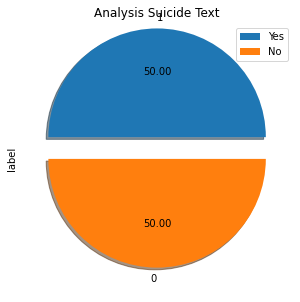

In [ ]:
plt.figure(figsize = (8,5),facecolor='white')
data_cl['label'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f", title='Analysis Suicide Text')
plt.legend(['Yes','No'])
plt.show()

Data balance antara label 1 dan 0, tidak perlu dilakukan handling imbalance. 

## Tokenization & Word Embedding

Tokenization digunakan untuk proses pembagian teks yang panjang menjadi bagian yang lebih kecil. dan Word Embedding digunakan sbg proses konversi kata yang berupa karakter alphanumeric kedalam bentuk vector.

### Spliting Data

In [ ]:
# Splitting Corpus

X_train, X_test, y_train, y_test = train_test_split(data_cl.preprocessed, 
                                                    data_cl.label, 
                                                    test_size=0.25, 
                                                    random_state=46, 
                                                    stratify=data_cl.label)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (174055,)
Test Size  :  (58019,)


### CountVectorizer

menghitung frekuensi kata dalam dokumen

In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<174055x125769 sparse matrix of type '<class 'numpy.int64'>'
	with 7833661 stored elements in Compressed Sparse Row format>

In [ ]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 125769
Panjang maksimum kalimat: 5717 kata


### TextVectorization

Menggunakan textvectorization untuk menerjemahkan kata-kata menjadi sekumpulan angka yang dapat dimengerti mesin

In [ ]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train)

In [ ]:
# Contoh Text Vectorization

## Contoh Document
print('Contoh Document')
print(data_cl.preprocessed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data_cl.preprocessed[0]]))
print('Ukuran vector : ', text_vectorization([data_cl.preprocessed[0]]).shape)

Contoh Document
ex wife threaten suiciderec left wife good cheat twice lie much decid refus go back day ago began threaten suicid tireless spent paat day talk keep hesit want believ come back know lot peopl threaten order get way happen realli suppos handl death hand still love wife deal get cheat constant feel insecur worri today may day hope much doesnt happen

Hasil Text Vectorization
tf.Tensor([[487 578 961 ...   0   0   0]], shape=(1, 5717), dtype=int64)
Ukuran vector :  (1, 5717)


Melihat hasil text vectorization 

In [ ]:
text_vectorization.get_vocabulary()[578]

'wife'

In [ ]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'like',
 'want',
 'feel',
 'dont',
 'get',
 'know',
 'go',
 'life',
 'time',
 'fuck',
 'think',
 'peopl',
 'one',
 'friend',
 'even',
 'year',
 'ive',
 'would']

### Embedding

In [ ]:
# Embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
# Contoh Hasil Embedding

## Contoh Document
print('Contoh Document')
print(data_cl.preprocessed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data_cl.preprocessed[0]]))
print('Ukuran vector : ', text_vectorization([data_cl.preprocessed[0]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([data_cl.preprocessed[0]])))
print('Ukuran vector : ', embedding(text_vectorization([data_cl.preprocessed[0]])).shape)

Contoh Document
ex wife threaten suiciderec left wife good cheat twice lie much decid refus go back day ago began threaten suicid tireless spent paat day talk keep hesit want believ come back know lot peopl threaten order get way happen realli suppos handl death hand still love wife deal get cheat constant feel insecur worri today may day hope much doesnt happen

Hasil Text Vectorization
tf.Tensor([[487 578 961 ...   0   0   0]], shape=(1, 5717), dtype=int64)
Ukuran vector :  (1, 5717)

Hasil Embedding
tf.Tensor(
[[[ 0.01769567  0.03601753  0.00213963 ...  0.0118136  -0.03324159
    0.00566309]
  [ 0.01572242  0.04174847  0.03580541 ...  0.02160095  0.04646376
   -0.04218812]
  [ 0.04431841  0.0297348   0.02892493 ... -0.00852946  0.03528691
    0.04802438]
  ...
  [ 0.01617895  0.0269809  -0.02604597 ...  0.03273987  0.02329906
   -0.0236899 ]
  [ 0.01617895  0.0269809  -0.02604597 ...  0.03273987  0.02329906
   -0.0236899 ]
  [ 0.01617895  0.0269809  -0.02604597 ...  0.03273987  0.02

### Visualisasi Wordcloud

In [ ]:

# slicing
suicide_prep = data_cl[data_cl.label==1]['preprocessed']
not_suicide_prep = data_cl[data_cl.label==0]['preprocessed'].sample(100, random_state=0)

# merge dalam satu bracket list
join_sui_prep = '. '.join(list(suicide_prep.values))
join_not_prep = '. '.join(list(not_suicide_prep.values))


# label 1
with open('join_sui_prep.txt', 'w') as f:
    f.write(join_sui_prep)
# label 0
with open('join_not_prep.txt', 'w') as f:
    f.write(join_not_prep)


Menampilkan kata -kata yang sering muncul di dalam kategori suicide 

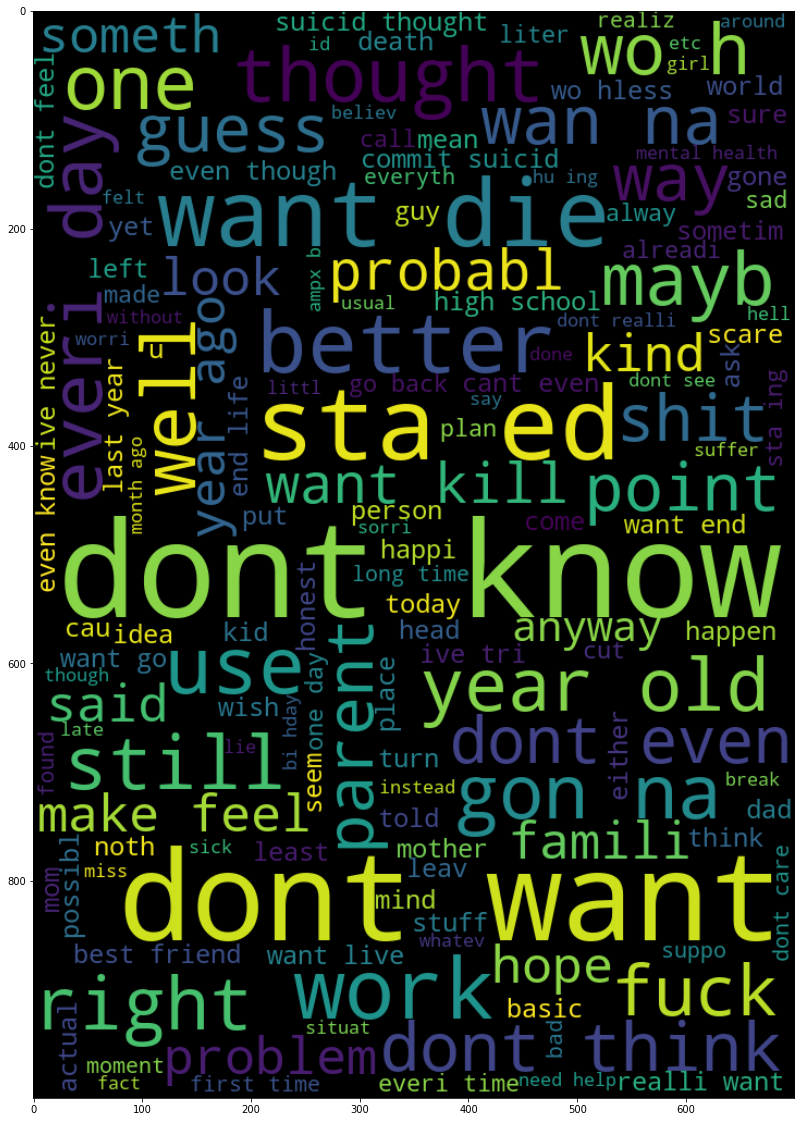

In [ ]:
# kata kata suicide
plt.figure(figsize = (20,20)) 

w_cloud = WordCloud(background_color='black', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(suicide_prep))

plt.imshow(w_cloud,interpolation = 'bilinear')

Menampilkan kata kata yang sering muncul di kategori non-suicide. 

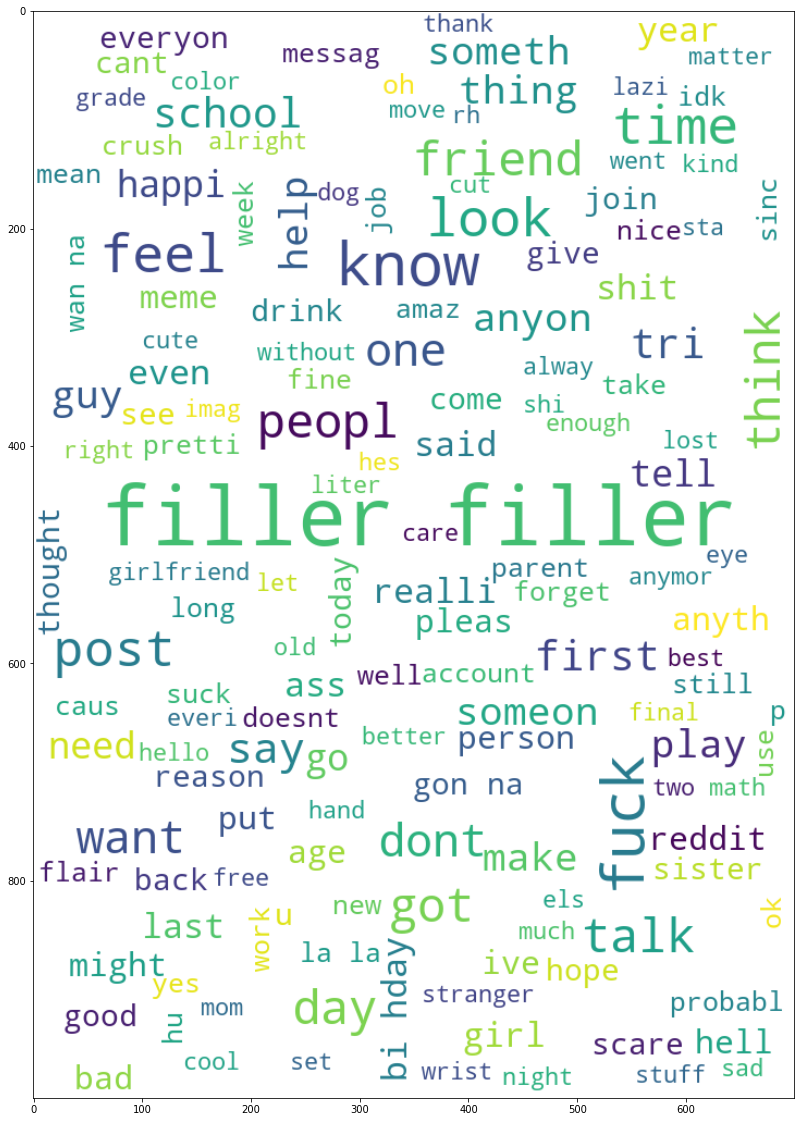

In [ ]:
# kata kata non-suicide
plt.figure(figsize = (20,20))

w_cloud = WordCloud(background_color='white', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(not_suicide_prep))

plt.imshow(w_cloud,interpolation = 'bilinear')


Plotting kata kata pada masing-masing kategori 

In [ ]:
#Definisi list kata-kata pada masing2 kategori
suicide_words=[]
nonsuicide_words=[]


#Memasukkan kata-kata yang berada pada semua tweet untu masing-masing kategori
for txt in data_cl['preprocessed'][data_cl['label']==1]:
    for wrd in txt.split(' '):
        suicide_words.append(wrd)

for txt in data_cl['preprocessed'][data_cl['label']==0]:
    for wrd in txt.split(' '):
        nonsuicide_words.append(wrd)

#mengubah list menjadi pandas Series dan menghilangkan string kosong ''
suic_wd=pd.Series(suicide_words)[pd.Series(suicide_words)!='']
nonsuic_wd=pd.Series(nonsuicide_words)[pd.Series(nonsuicide_words)!='']


Melihat 30 kata teratas pada kategori suicide 

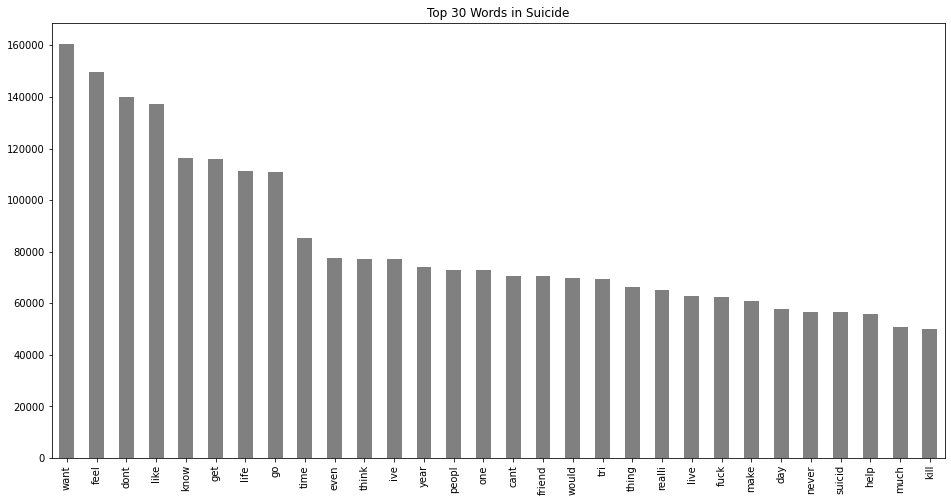

In [ ]:
suic_wd.value_counts()[:30].plot(kind='bar',title='Top 30 Words in Suicide',figsize=(16,8),color='grey')

Melihat 30 kata teratas di kategori nonsuicide

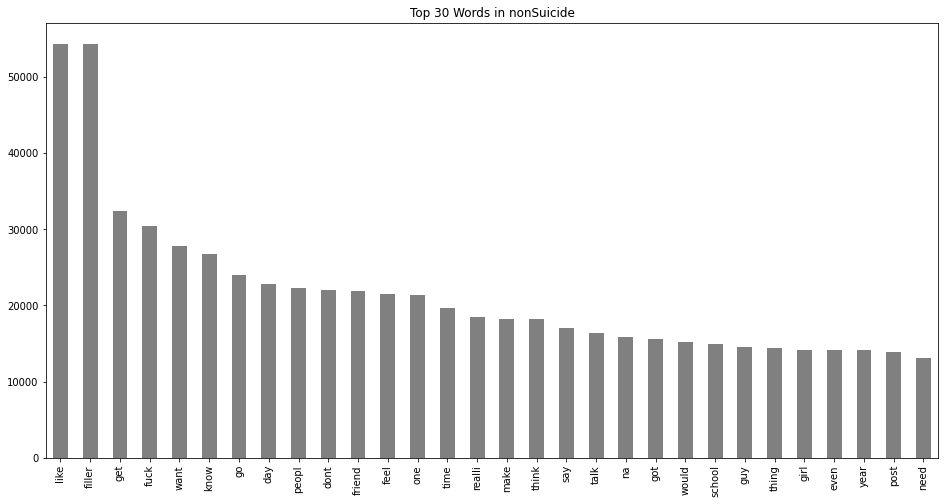

In [ ]:
nonsuic_wd.value_counts()[:30].plot(kind='bar',title='Top 30 Words in nonSuicide',figsize=(16,8),color='grey')

Dari visualisasi diatas didapatkan bahwa kedua kategori ini memiliki kemiripan kata-kata yang sering muncul karena keduanya merupakan konotasi negatif. Suicide mengindikasi ke arah bunuh diri , sedangkan non-suicide mengindikasi ke arah hanya depresi saja. Sehingga runutan kata sepertinya tidak diharuskan, namun perbedaan nya terdapat langsung di kata kata nya, jika suicide maka akan muncul kata suicide atau kill. Mari kita lihat di dalam model yang akan dibangun.

## Model Building

Model yang akan digunakan dalam pemodelan NLP ini adalah :
- DNN 
- LSTM 
- GRU 

### Deep Learning - Fully Connected Layer

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_dnn_hist_1 = model.fit(X_train,
                         y_train,
                         epochs=10,batch_size=128,
                         validation_data=(X_test, y_test))

Epoch 1/10
1360/1360 [==============================] - 46s 34ms/step - loss: 0.3628 - accuracy: 0.8605 - val_loss: 0.2482 - val_accuracy: 0.9033
Epoch 2/10
1360/1360 [==============================] - 45s 33ms/step - loss: 0.2291 - accuracy: 0.9147 - val_loss: 0.2173 - val_accuracy: 0.9173
Epoch 3/10
1360/1360 [==============================] - 45s 33ms/step - loss: 0.2080 - accuracy: 0.9222 - val_loss: 0.2165 - val_accuracy: 0.9264
Epoch 4/10
1360/1360 [==============================] - 45s 33ms/step - loss: 0.1952 - accuracy: 0.9277 - val_loss: 0.1960 - val_accuracy: 0.9296
Epoch 5/10
1360/1360 [==============================] - 45s 33ms/step - loss: 0.1863 - accuracy: 0.9308 - val_loss: 0.2028 - val_accuracy: 0.9282
Epoch 6/10
1360/1360 [==============================] - 45s 33ms/step - loss: 0.1808 - accuracy: 0.9328 - val_loss: 0.1904 - val_accuracy: 0.9322
Epoch 7/10
1360/1360 [==============================] - 46s 34ms/step - loss: 0.1742 - accuracy: 0.9354 - val_loss: 0.1836 -

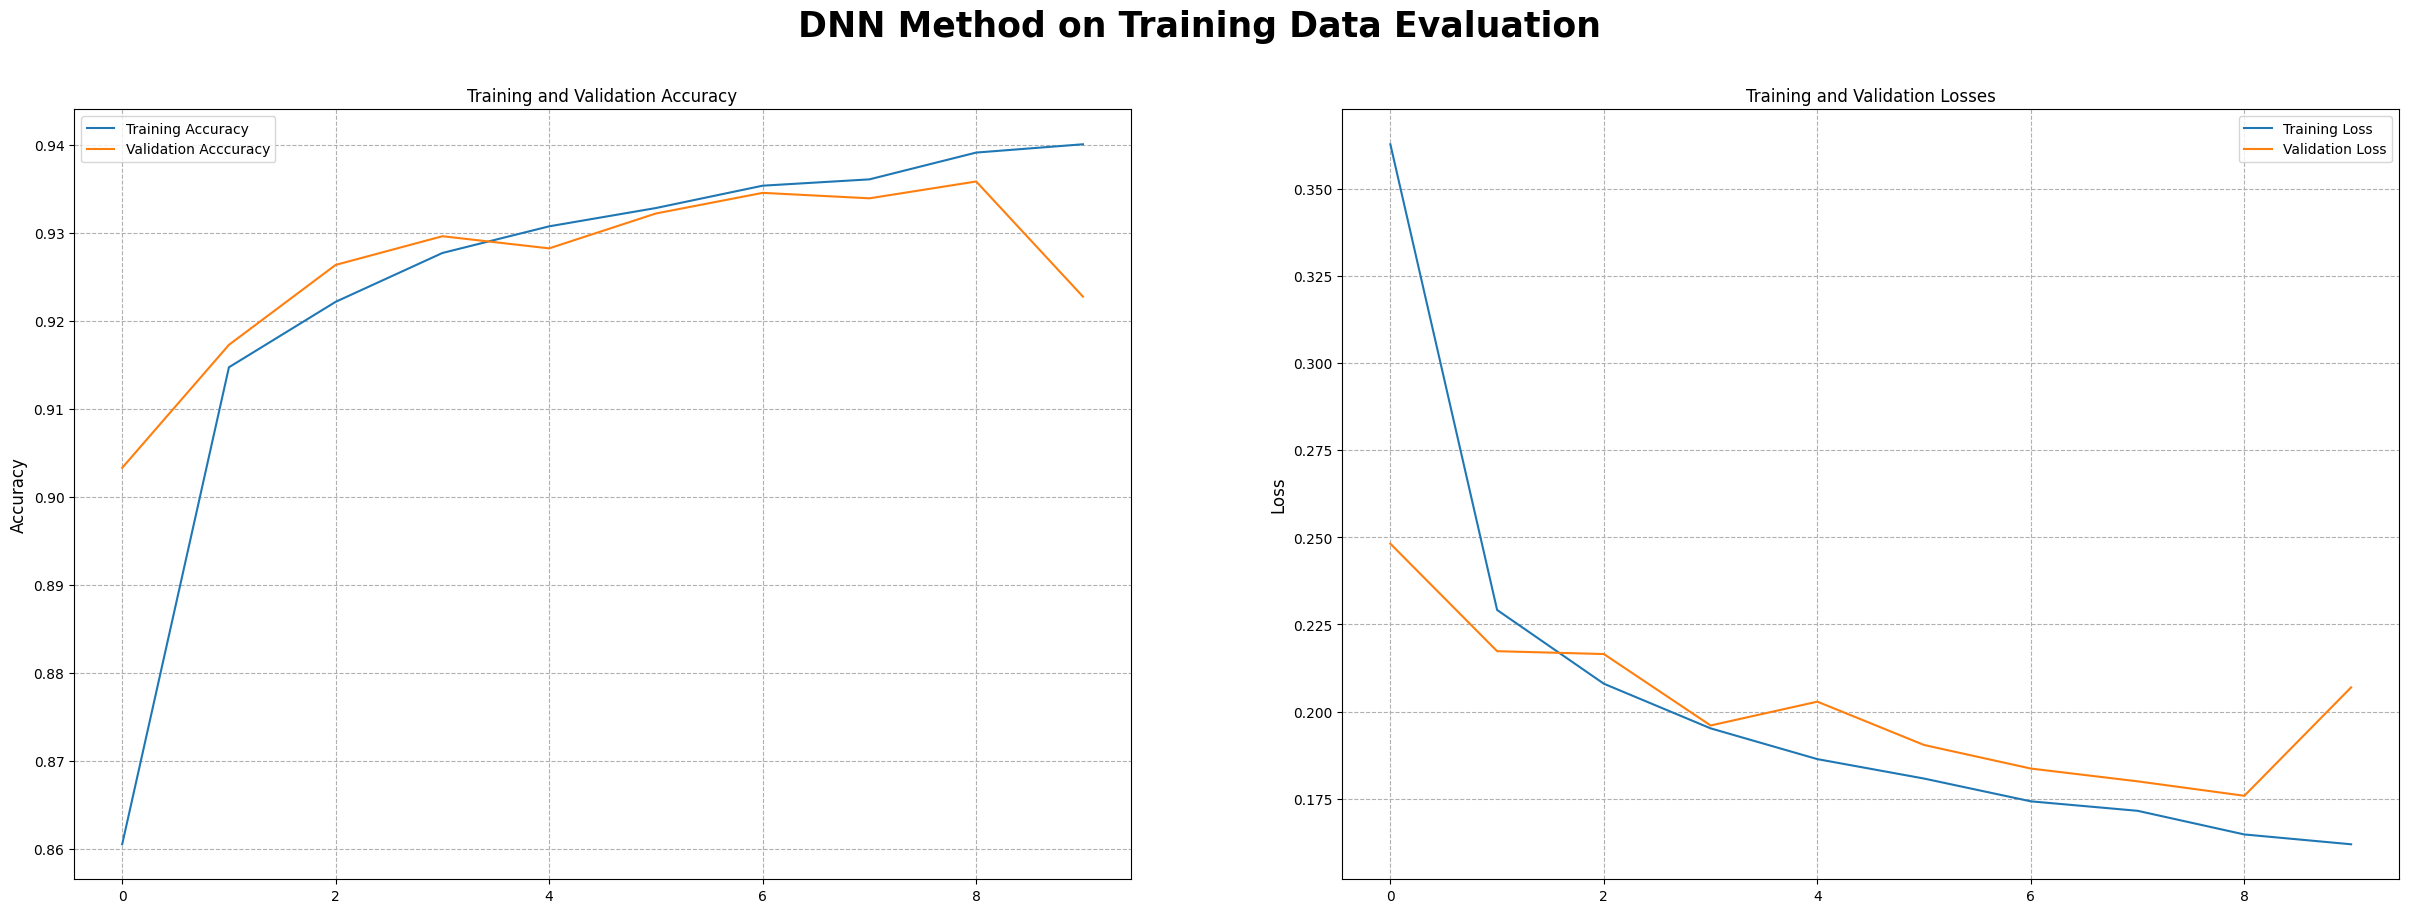

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('DNN Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_dnn_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_dnn_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_dnn_hist_1.history['loss'], label="Training Loss")
plt.plot(model_dnn_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model pertama menggunakan DNN model, model berjalan dengan baik dan mempunyai validasi akurasi yang tinggi sekitar 0.935, meskipun terdapat sedikit lonjakan gradient namun nilainya hanya turun 0.1. Untuk nilai validasi loss nya pun baik, sekitar 0.175. 

### LSTM

In [ ]:
# Model Training dengan Menggunakan LSTM

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

model_lstm_hist_1 = model.fit(X_train,
                         y_train,
                         epochs=10,batch_size=128,
                         callbacks=[es,mc],
                         validation_data=(X_test, y_test))

Epoch 1/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4991
Epoch 1: val_accuracy improved from -inf to 0.50001, saving model to checkpoint/


1360/1360 [==============================] - 525s 379ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4980
Epoch 2: val_accuracy improved from 0.50001 to 0.50003, saving model to checkpoint/


1360/1360 [==============================] - 512s 376ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4979
Epoch 3: val_accuracy did not improve from 0.50003
1360/1360 [==============================] - 518s 381ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5013
Epoch 4: val_accuracy did not improve from 0.50003
1360/1360 [==============================] - 505s 371ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4991
Epoch 5: val_accuracy did not improve from 0.50003
1360/1360 [==============================] - 502s 369ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch

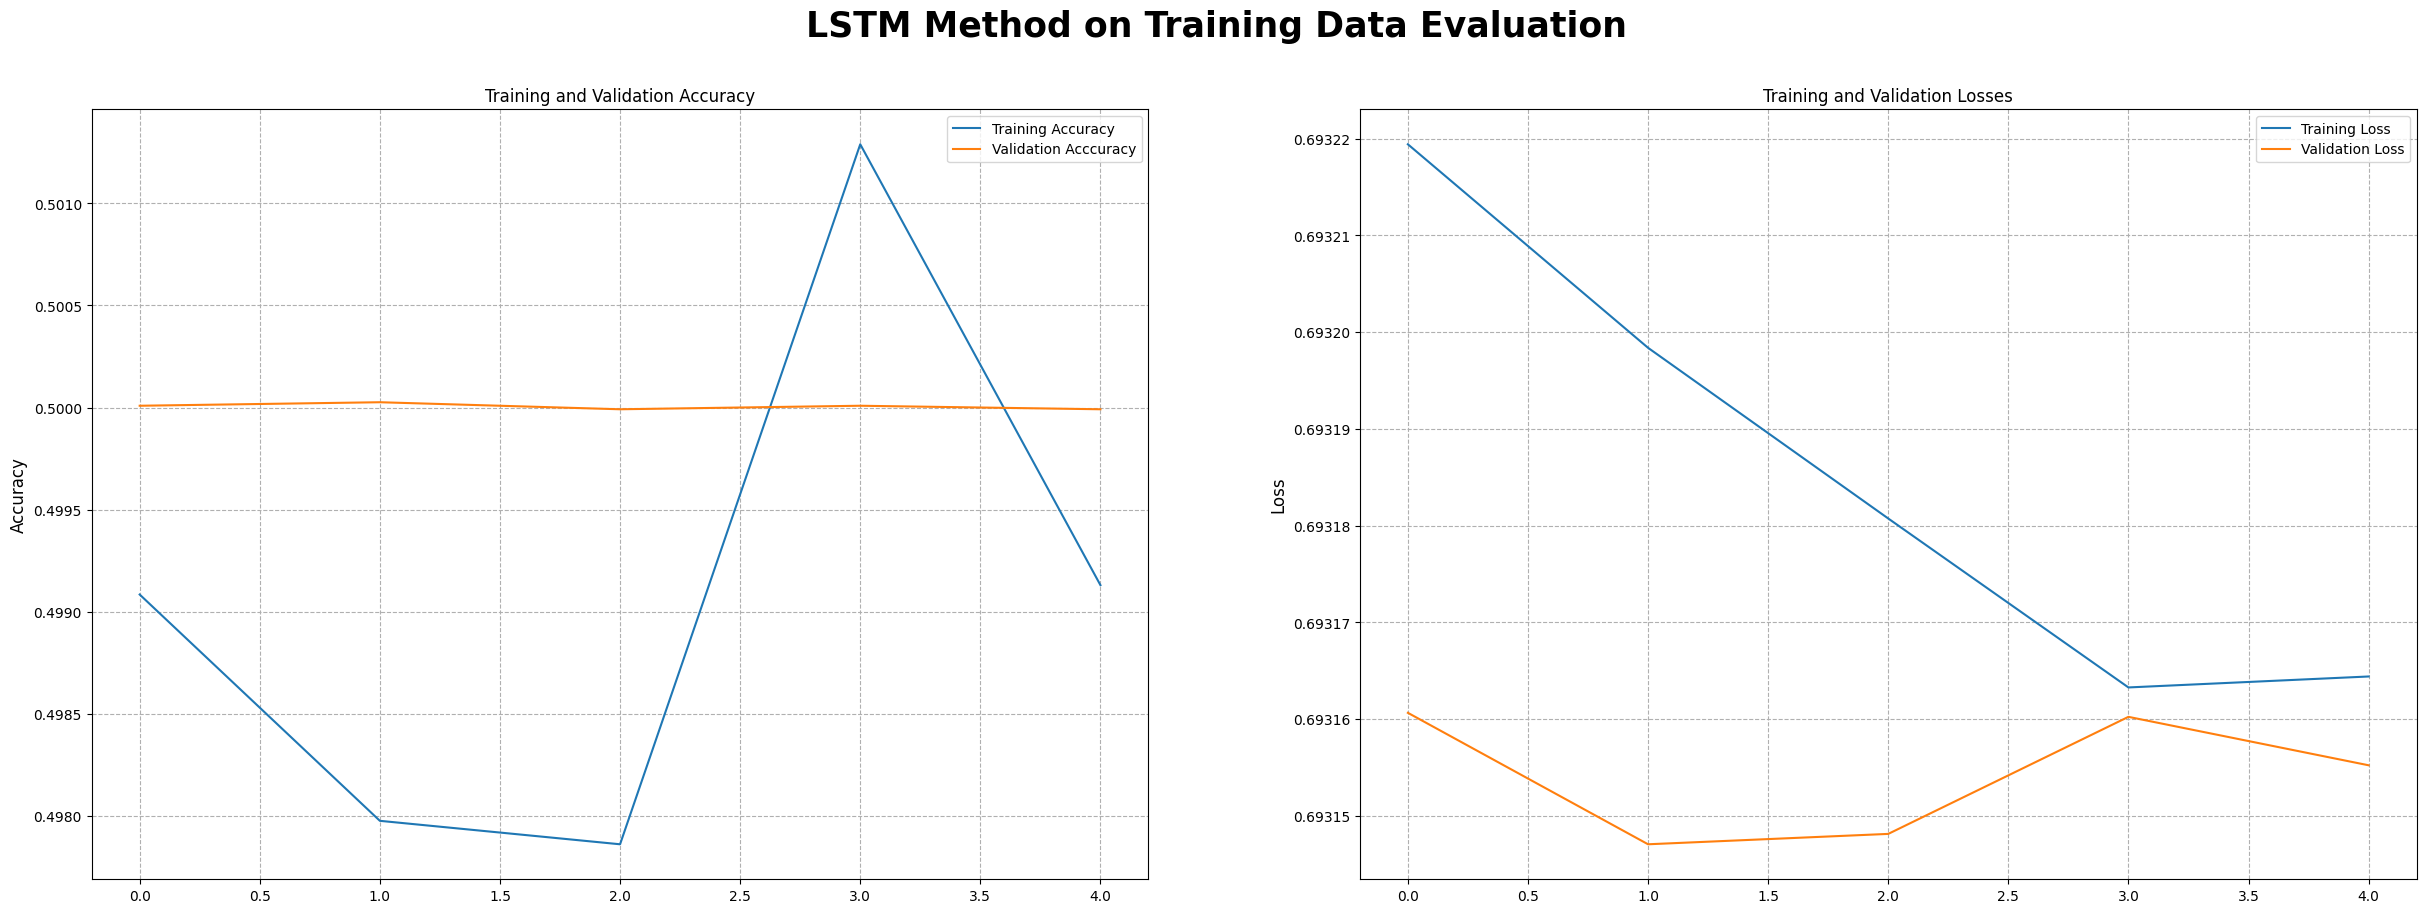

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('LSTM Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_lstm_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_lstm_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_lstm_hist_1.history['loss'], label="Training Loss")
plt.plot(model_lstm_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Untuk model kedua menggunakan LSTM, model berjalan dengan tidak baik, akurasi hanya mencapai 0.5 dan sangat overfit. begitu pula dengan validasi loss nya . 

### GRU

In [ ]:
# Model Training dengan Menggunakan GRU

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

model_gru_hist_1 = model.fit(X_train,
                         y_train,
                         epochs=10,batch_size=128,
                         callbacks=[es,mc],
                         validation_data=(X_test, y_test))

Epoch 1/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4996
Epoch 1: val_accuracy improved from -inf to 0.49999, saving model to checkpoint/


1360/1360 [==============================] - 623s 456ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4978
Epoch 2: val_accuracy improved from 0.49999 to 0.50001, saving model to checkpoint/


1360/1360 [==============================] - 619s 455ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4990
Epoch 3: val_accuracy did not improve from 0.50001
1360/1360 [==============================] - 612s 450ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4991
Epoch 4: val_accuracy did not improve from 0.50001
1360/1360 [==============================] - 610s 449ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
1360/1360 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5012
Epoch 5: val_accuracy did not improve from 0.50001
1360/1360 [==============================] - 610s 449ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch

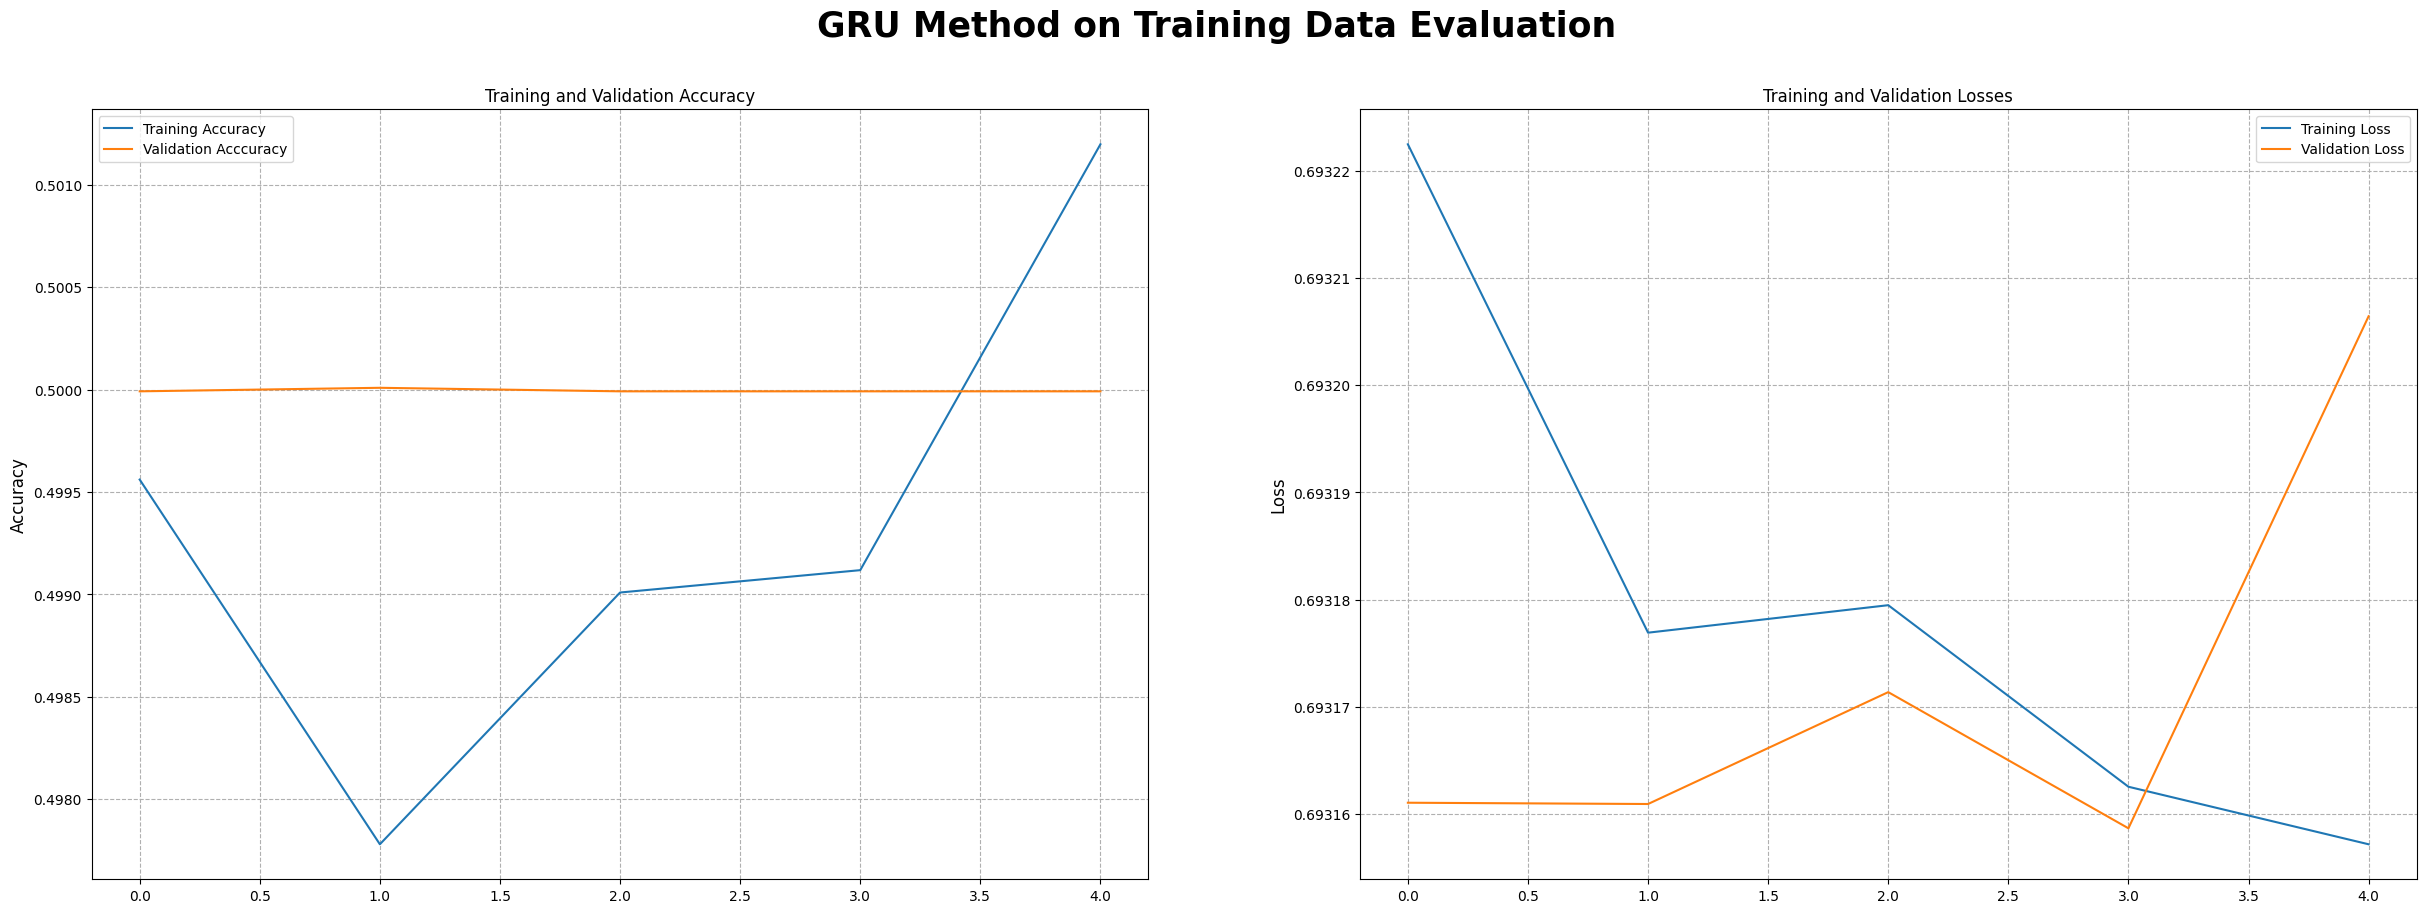

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('GRU Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_gru_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_gru_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_gru_hist_1.history['loss'], label="Training Loss")
plt.plot(model_gru_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Untuk model ketiga menggunakan GRU, model berjalan dengan tidak baik, akurasi hanya mencapai 0.5 dan sangat overfit. begitu pula dengan validasi loss nya .

## Model Improvement 

Dari ketiga model diatas dinilai dari nilai accuracy dan loss nya , akan dipilih 1 model yang akan dilakukan hyperparameter tuning yaitu model DNN.

#### Model DNN with Hyperparameter Tuning

In [103]:
model2 = Sequential()
model2.add(text_vectorization)
model2.add(embedding)
model2.add(GlobalAveragePooling1D())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

model2_dnn_hist_2 = model2.fit(X_train,
                         y_train,
                         epochs=20,batch_size=128,
                         callbacks=[es,mc],
                         validation_data=(X_test, y_test))

Epoch 1/20
1359/1360 [============================>.] - ETA: 0s - loss: 0.6129 - accuracy: 0.8109
Epoch 1: val_accuracy improved from -inf to 0.84719, saving model to checkpoint/
1360/1360 [==============================] - 48s 35ms/step - loss: 0.6129 - accuracy: 0.8109 - val_loss: 0.5213 - val_accuracy: 0.8472
Epoch 2/20
1359/1360 [============================>.] - ETA: 0s - loss: 0.4399 - accuracy: 0.8639
Epoch 2: val_accuracy improved from 0.84719 to 0.86079, saving model to checkpoint/
1360/1360 [==============================] - 47s 34ms/step - loss: 0.4399 - accuracy: 0.8639 - val_loss: 0.3816 - val_accuracy: 0.8608
Epoch 3/20
1359/1360 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8862
Epoch 3: val_accuracy improved from 0.86079 to 0.90345, saving model to checkpoint/
1360/1360 [==============================] - 47s 34ms/step - loss: 0.3354 - accuracy: 0.8862 - val_loss: 0.3128 - val_accuracy: 0.9034
Epoch 4/20
1359/1360 [============================>.

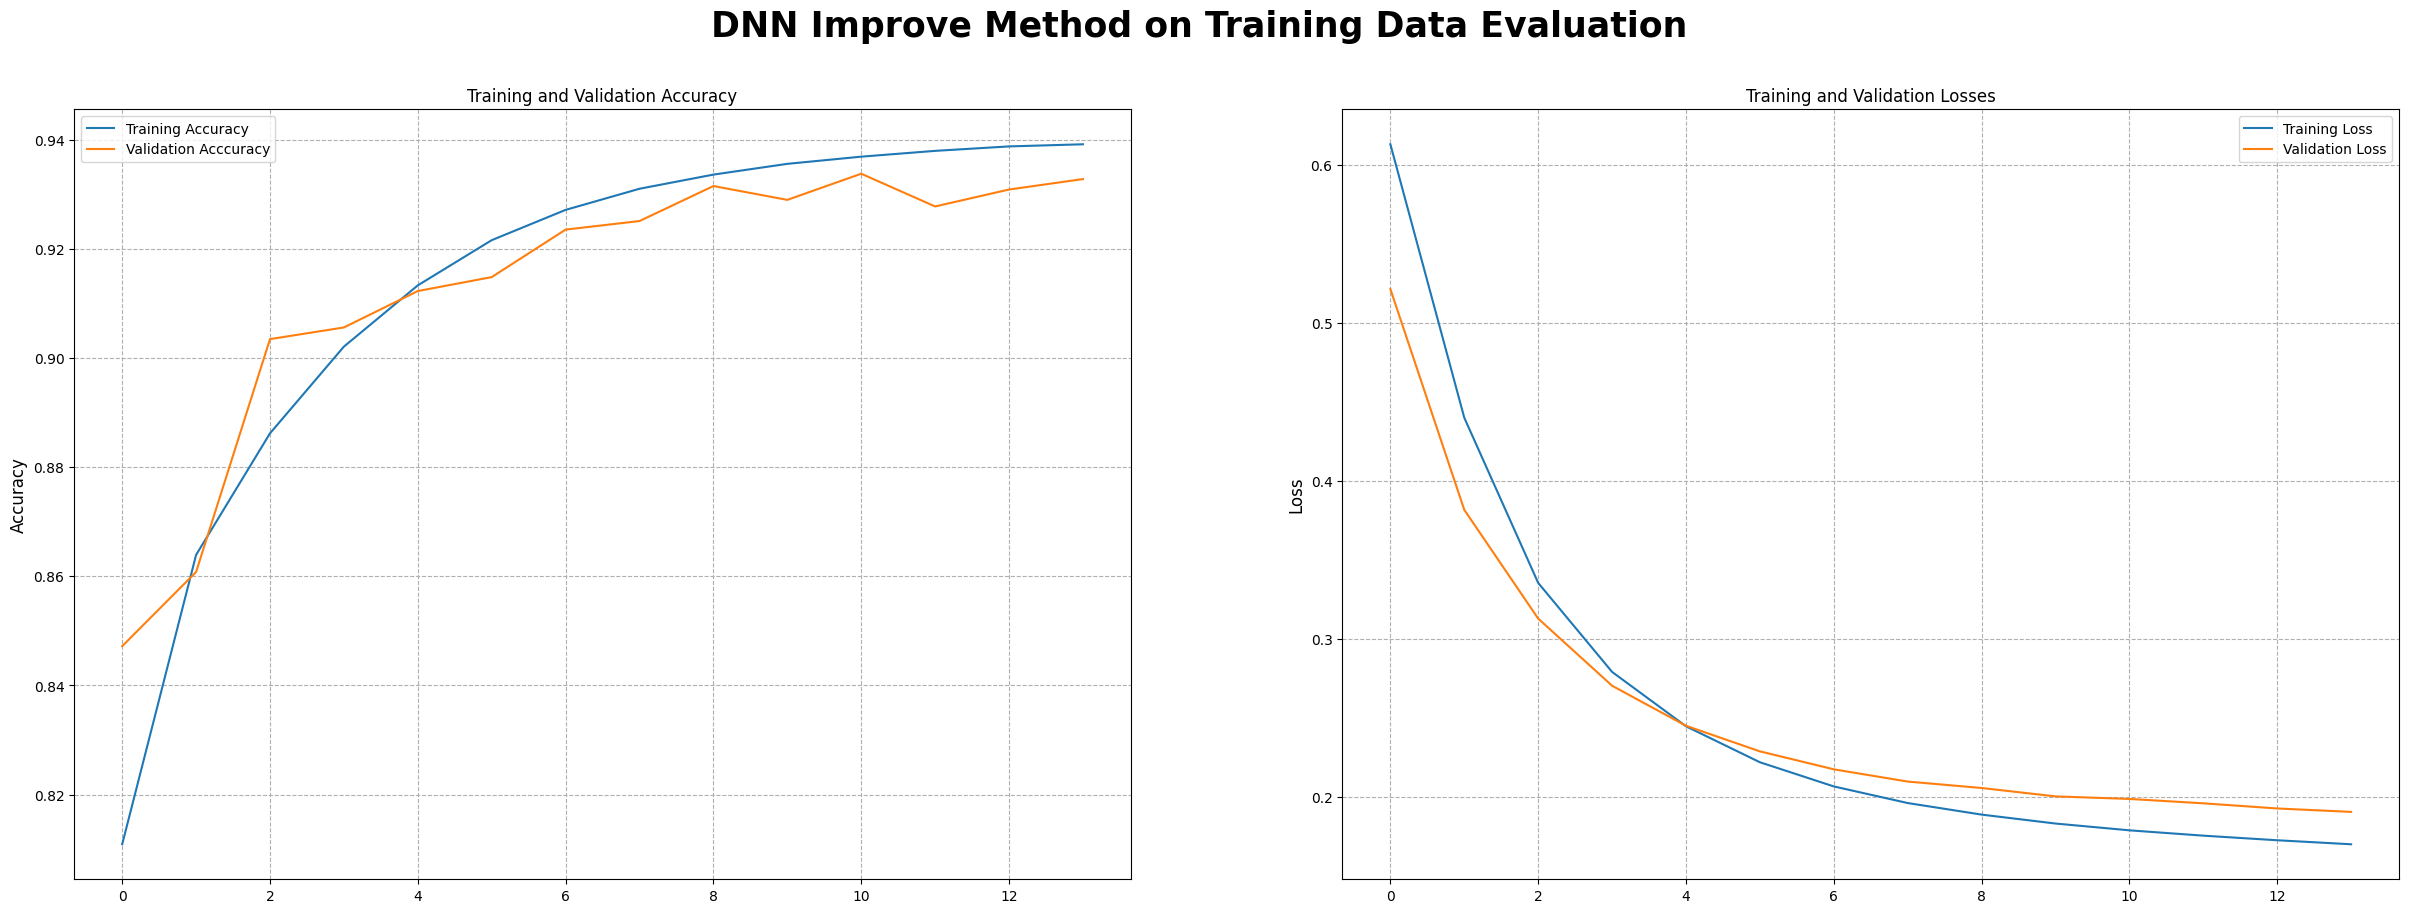

In [105]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('DNN Improve Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model2_dnn_hist_2.history['accuracy'],label="Training Accuracy")
plt.plot(model2_dnn_hist_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model2_dnn_hist_2.history['loss'], label="Training Loss")
plt.plot(model2_dnn_hist_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Dari hasil hyperparameter tuning didapatkan bahwa model berjalan dengan baik dan tidak ada lonjakan gradient dan juga bestfit. Nilai akurasi mencapai 0.93 dan loss sebesar 0.1.  

## Model Evaluation 

In [106]:
# Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)


907/907 [==============================] - 4s 4ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     29009
           1       0.94      0.92      0.93     29010

    accuracy                           0.93     58019
   macro avg       0.93      0.93      0.93     58019
weighted avg       0.93      0.93      0.93     58019



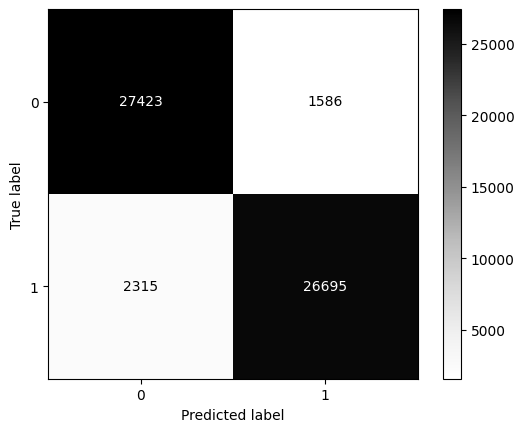

In [107]:

# predict probabilities
y_pred_sequent = model2.predict(test_dataset)
y_pred_sequent = (y_pred_sequent > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_sequent, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_sequent)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

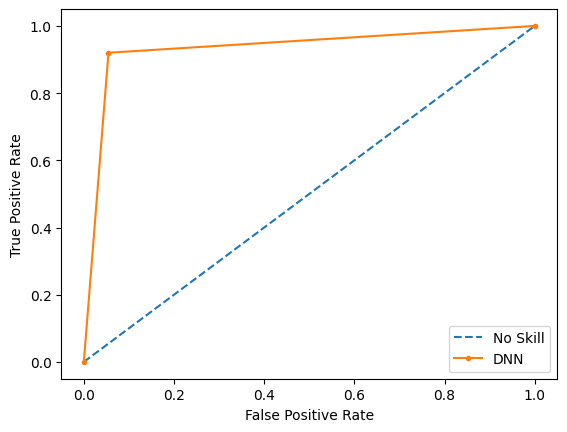

AUC score: 0.9327636216358535


In [108]:

# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sequent)
auc = roc_auc_score(y_test, y_pred_sequent)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Untuk model evaluasi hasil clasification report menunjukan pada nilai recall mencapai 0.92 dan nilai false negative sejumlah 2315. Untuk nilai AUC Score, semakin mendekati nilai 1 maka model semakin akurat memprediksi. Nilai AUC score nya mencapai 0.932 maka model dikatakan baik. 

## Model Saving

In [ ]:
pickle.dump(cleaner, open('cleaner.pkl','wb'))


In [ ]:
pickle.dump(Vectorize, open('Vectorize.pkl','wb'))

In [110]:
model2.save('model_suicide.tf')

## Model Inference

In [111]:
# Predict New Texts

inf = {'text' : "I have my two best friends and both of them are so loving & encouraging. We texted a few times a week before the pandemic, but I knew it was super stressful for them with kids at home and work etc. I didn't expect for my mood to bottom out like it did. I am still extremely isolated because of me having a serious immune system deficiency. I didn't exactly notice my decline, except I started having mixed episodes. One of my friends is also type 2 bipolar. She just gets me in a way others don't. She can truly empathize with me because she lives it too. It also helps me feel useful to let them vent or help them through something. I am disabled and I feel very useless at times, so knowing I help them helps me"}

inferences = pd.DataFrame([inf])
inferences
     


,text
0,I have my two best friends and both of them ar...


In [112]:
inferences.shape

(1, 1)

In [113]:
inference = cleaner(inferences)

In [114]:
inference

,text,preprocessed
0,I have my two best friends and both of them ar...,two best friend love encourag text time week p...


In [115]:
inf_predict = model2.predict(inference['preprocessed'])
inf_predict

1/1 [==============================] - 0s 76ms/step


array([[0.30574897]], dtype=float32)

In [116]:
# interpretation for churn
if inf_predict == 1:
    print("Suicide")
else:
    print("Non-suicide")
     

Non-suicide


## Conclusion

- Model DNN berjalan dengan cukup baik pada prediksi Text Classification suicide. Model ini terpilih karena nilai validasi nya yang cukup tinggi dan juga dengan mempertimbangkan model bisa berjalan tanpa harus melihat runutan kalimat, model sudah bisa mengenali suicide atau bukan. 
- Untuk kedua model lainnya LSTM dan GRU, keduanya mempertimbangkan runutan dalam kalimat, sedangkan komposisi kata di kedua kategori ini hampir sama, sehingga model berjalan kurang baik.
- Untuk kedepannya bisa melakukan data preprocessing lebih detail lagi dengan menghilangkan kata-kata yang sering muncul di kedua kategori. Dan bisa kita anggap stopwords. 
